In [28]:
%matplotlib inline
import numpy as np
import tweepy
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = 50
pd.options.display.max_rows= 50
pd.options.display.width= 120

In [29]:
#auth here with your own auth
auth = tweepy.OAuthHandler('', '')
auth.set_access_token('', '')
api = tweepy.API(auth)

In [30]:
QUERY = 'esports'

results = api.search(q=QUERY)


In [31]:
len(results)

15

In [32]:
def print_tweet(tweet):
    print("@%s - %s (%s)" % (tweet.user.screen_name, tweet.user.name, tweet.created_at))
    print(tweet.text)

tweet=results[1]
print_tweet(tweet)

@FIFAwCup2018 - FIFA World Cup 2018 (2017-08-16 23:35:01)
Telemundo is broadcasting FIFA's esports World Cup – Digiday https://t.co/03MQRVqMrZ https://t.co/XlV6FAD3vR


In [33]:
tweet=results[2]

for param in dir(tweet):
    if not param.startswith("_"):
        print("%s : %s" % (param, eval("tweet." + param)))

author : User(_api=<tweepy.api.API object at 0x000000775D377588>, _json={'id': 66752142, 'id_str': '66752142', 'name': 'Cristian K.', 'screen_name': 'voltageceo', 'location': 'Henderson, NV', 'description': 'CEO & Owner of @voltagegamingco ☇☇ Married to @krzypanda☇☇ Lives in Waegwan, South Korea ☇☇ US Soldier', 'url': 'https://t.co/Mc0LVJq4xE', 'entities': {'url': {'urls': [{'url': 'https://t.co/Mc0LVJq4xE', 'expanded_url': 'http://voltagegaming.com', 'display_url': 'voltagegaming.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 455, 'friends_count': 944, 'listed_count': 10, 'created_at': 'Tue Aug 18 18:10:37 +0000 2009', 'favourites_count': 1437, 'utc_offset': -14400, 'time_zone': 'Eastern Time (US & Canada)', 'geo_enabled': True, 'verified': False, 'statuses_count': 3729, 'lang': 'en', 'contributors_enabled': False, 'is_translator': False, 'is_translation_enabled': False, 'profile_background_color': '080400', 'profile_background_image_

In [34]:
user=tweet.author

for param in dir(user):
    if not param.startswith("_"):
        print("%s : %s" % (param, eval("user." + param)))

contributors_enabled : False
created_at : 2009-08-18 18:10:37
default_profile : False
default_profile_image : False
description : CEO & Owner of @voltagegamingco ☇☇ Married to @krzypanda☇☇ Lives in Waegwan, South Korea ☇☇ US Soldier
entities : {'url': {'urls': [{'url': 'https://t.co/Mc0LVJq4xE', 'expanded_url': 'http://voltagegaming.com', 'display_url': 'voltagegaming.com', 'indices': [0, 23]}]}, 'description': {'urls': []}}
favourites_count : 1437
follow : <bound method User.follow of User(_api=<tweepy.api.API object at 0x000000775D377588>, _json={'id': 66752142, 'id_str': '66752142', 'name': 'Cristian K.', 'screen_name': 'voltageceo', 'location': 'Henderson, NV', 'description': 'CEO & Owner of @voltagegamingco ☇☇ Married to @krzypanda☇☇ Lives in Waegwan, South Korea ☇☇ US Soldier', 'url': 'https://t.co/Mc0LVJq4xE', 'entities': {'url': {'urls': [{'url': 'https://t.co/Mc0LVJq4xE', 'expanded_url': 'http://voltagegaming.com', 'display_url': 'voltagegaming.com', 'indices': [0, 23]}]}, 'de

In [41]:
results = []
for tweet in tweepy.Cursor(api.search, QUERY).items(100):
    results.append(tweet)

print(len(results))

100


In [42]:
def process_results(results):
    id_list = [tweet.id for tweet in results]
    data_set = pd.DataFrame(id_list, columns=["id"])

    # Processing Tweet Data

    data_set["text"] = [tweet.text for tweet in results]
    data_set["created_at"] = [tweet.created_at for tweet in results]
    data_set["retweet_count"] = [tweet.retweet_count for tweet in results]
    data_set["favorite_count"] = [tweet.favorite_count for tweet in results]
    data_set["source"] = [tweet.source for tweet in results]

    # Processing User Data
    data_set["user_id"] = [tweet.author.id for tweet in results]
    data_set["user_screen_name"] = [tweet.author.screen_name for tweet in results]
    data_set["user_name"] = [tweet.author.name for tweet in results]
    data_set["user_created_at"] = [tweet.author.created_at for tweet in results]
    data_set["user_description"] = [tweet.author.description for tweet in results]
    data_set["user_followers_count"] = [tweet.author.followers_count for tweet in results]
    data_set["user_friends_count"] = [tweet.author.friends_count for tweet in results]
    data_set["user_location"] = [tweet.author.location for tweet in results]

    return data_set
data_set = process_results(results)

In [43]:
data_set.head(5)

,id,text,created_at,retweet_count,favorite_count,source,user_id,user_screen_name,user_name,user_created_at,user_description,user_followers_count,user_friends_count,user_location
0,897965293393268736,RT @overdotgg: 📰 @MGC_HooWoo and @MGC_Hus join...,2017-08-16 23:36:23,23,0,Twitter for Android,752321144,jessla__,Jess,2012-08-12 02:41:06,"Bad driving, can't swim, mathematics, Dim Sim(u)",188,355,"Melbourne, Victoria"
1,897965293003313154,RT @ARAesports: Pep Segura: “Estem a prop de f...,2017-08-16 23:36:23,2,0,Twitter for iPhone,2322828977,oscarlm98,FORA BARTOMEU 🔴🔵,2014-02-03 23:15:18,FÚTBOL CLUB BARCELONA 💙1899❤️ Leo Messi es D10...,2642,1750,"Barcelona, Països Catalans"
2,897965289681424384,El sueño olímpico de los esports: por qué por ...,2017-08-16 23:36:23,0,0,Twitter Web Client,881485500,faohdez71,Fabián Hdez-Lizano,2012-10-15 03:49:08,"I love have a lot of friends, read, music, pho...",979,2034,"Barva, Heredia, Costa Rica"
3,897965245217599489,@Dom_Sacco @Fandasuba @British_Esports Where's...,2017-08-16 23:36:12,0,0,Twitter for iPhone,803790567268356098,NavronGG,alex,2016-11-30 02:39:39,Adviser to @British_esports | I work at @Ganks...,170,86,navron@gankstars.gg
4,897965213609340929,RT @LylanDove: 2v2 1nD MWR @CMG_eSports #Champ...,2017-08-16 23:36:04,8,0,Twitter Web Client,743160203709923329,CoD_Fifa_ES,Steve L,2016-06-15 19:16:14,,1443,1984,"New York, USA"


In [44]:
data_set.tail(5)


,id,text,created_at,retweet_count,favorite_count,source,user_id,user_screen_name,user_name,user_created_at,user_description,user_followers_count,user_friends_count,user_location
95,897962762806206464,RT @ProTeamAG: ¡En vivo! #AztekSmite vs Absolu...,2017-08-16 23:26:20,4,0,Twitter for iPhone,3406022080,Sergiojosueee,Sergio Josue,2015-08-06 17:51:50,,40,293,
96,897962752240693249,RT @CallofDuty: RT for a chance to WIN the #CW...,2017-08-16 23:26:18,14231,0,Twitter for Android,2743274235,JoshLecates,Josh LeCates,2014-08-15 06:21:10,,59,83,
97,897962739536199680,Contract sent out and done ! We Are Officially...,2017-08-16 23:26:15,3,11,Twitter Web Client,591749125,EmperorHD,TheemperorHD,2012-05-27 11:27:21,King Of Squad Builders 80k+ Subs On Youtube! E...,7048,969,Dubai
98,897962721643286528,RT @elnacionalcat: Sala-i-Martin acusa Xavier ...,2017-08-16 23:26:10,37,0,Twitter for iPad,2206061482,casals_carme,Carme Casals,2013-12-03 15:22:00,Saltenca de soca-rel,525,866,
99,897962571692740608,2v2 IW S&amp;D @CMG_eSports #Champin' w/ @Incl...,2017-08-16 23:25:35,0,0,Twitter for iPhone,712372010668724225,Lazc_,V4,2016-03-22 20:14:57,@Inssanitys | @LCMore_ | @__Ibrxhim | @Avzo_,491,383,


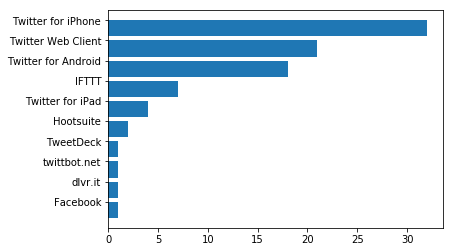

In [45]:
sources = data_set["source"].value_counts()[:10][::-1]

plt.barh(range(len(sources)), sources.values)
plt.yticks(np.arange(len(sources)) + 0.4, sources.index)
plt.show()